**For this project you will visualize time series data using a line chart, bar chart, and box plots. You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth**



In [221]:
!pip install pypalettes

In [222]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from pypalettes import get_hex

1.Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.


In [223]:
def parse_date(x):
    return datetime.strptime(x, "%Y-%m-%d")

In [224]:
df=pd.read_csv(r'/Users/beckyiyeh/Documents/hello_ds./fcc-forum-pageviews.csv' , index_col='date', parse_dates=['date'])
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


2. Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [225]:
df= df.query('value >= value.quantile(q=0.025)')
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [226]:
df=df.query('value <= value.quantile(q=0.975)')


In [227]:
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


3. Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.

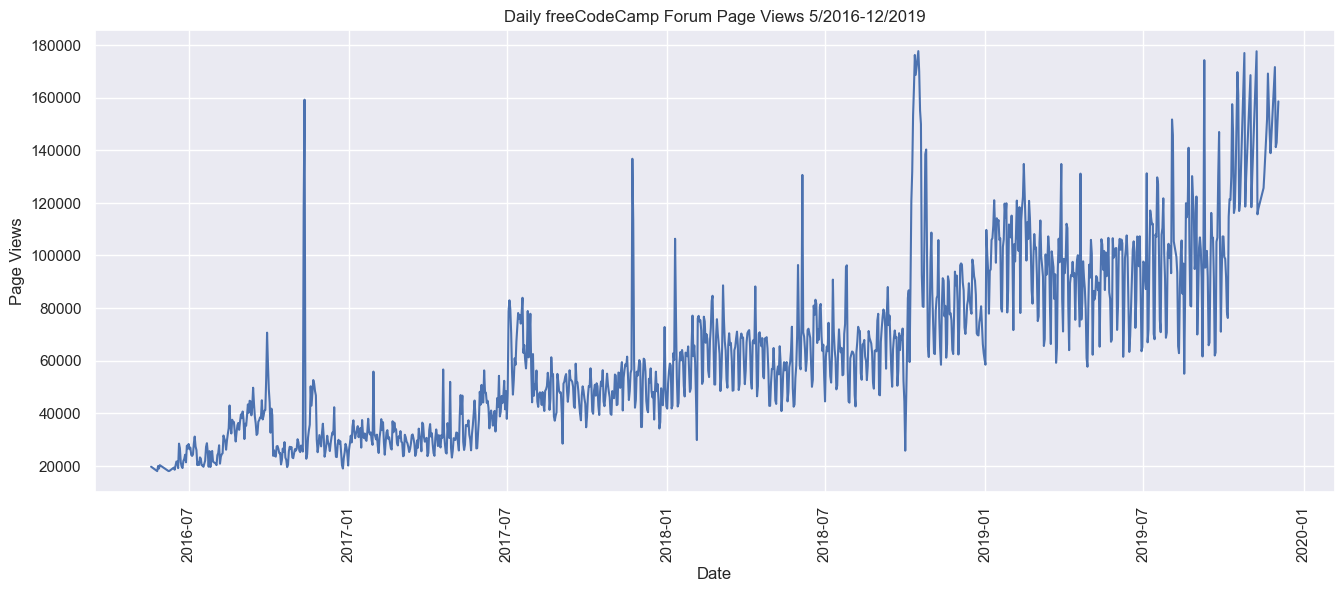

In [228]:
fig,axes= plt.subplots(figsize=(16,6))
axes=sns.lineplot(data=df, x='date', y='value')
axes.set_xlabel('Date')
axes.set_ylabel('Page Views')
axes.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
plt.xticks(rotation=90)
plt.show()


4. Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.

In [229]:
bar=df.copy().groupby(pd.Grouper(freq='ME')).mean().rename(columns={'value':'mean'})
bar['year']=pd.DatetimeIndex(bar.index).year
bar['month']=pd.DatetimeIndex(bar.index).strftime('%B')
bar

,mean,year,month
date,,,
2016-05-31,19432.400000,2016,May
2016-06-30,21875.105263,2016,June
2016-07-31,24109.678571,2016,July
2016-08-31,31049.193548,2016,August
2016-09-30,41476.866667,2016,September
2016-10-31,27398.322581,2016,October
2016-11-30,40448.633333,2016,November
2016-12-31,27832.419355,2016,December
2017-01-31,32785.161290,2017,January


In [230]:
bar=pd.melt(bar,id_vars=['year','month'],value_vars=['mean'])

In [231]:
bar

,year,month,variable,value
0,2016,May,mean,19432.400000
1,2016,June,mean,21875.105263
2,2016,July,mean,24109.678571
3,2016,August,mean,31049.193548
4,2016,September,mean,41476.866667
5,2016,October,mean,27398.322581
6,2016,November,mean,40448.633333
7,2016,December,mean,27832.419355
8,2017,January,mean,32785.161290
9,2017,February,mean,31113.071429


<Figure size 1200x1000 with 0 Axes>

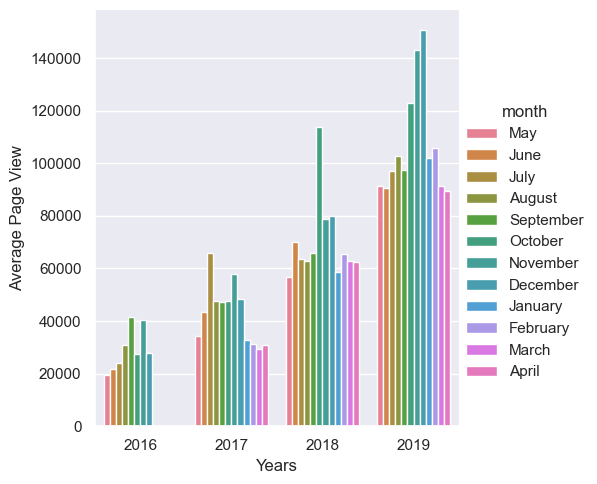

In [232]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(12,10))
graph=sns.catplot(x='year',y='value',data=bar,kind='bar',hue='month',legend=True)
           
graph.set_xlabels('Years')
graph.set_ylabels('Average Page View')
graph.set_titles('preety graph')


plt.show()


5. Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.

In [233]:
df_box = df.copy().rename(columns={'value':'views'})
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box
    # Draw box plots (using Seaborn)


,date,views,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1234,2019-11-24,138875,2019,Nov
1235,2019-11-29,171584,2019,Nov
1236,2019-11-30,141161,2019,Nov
1237,2019-12-01,142918,2019,Dec


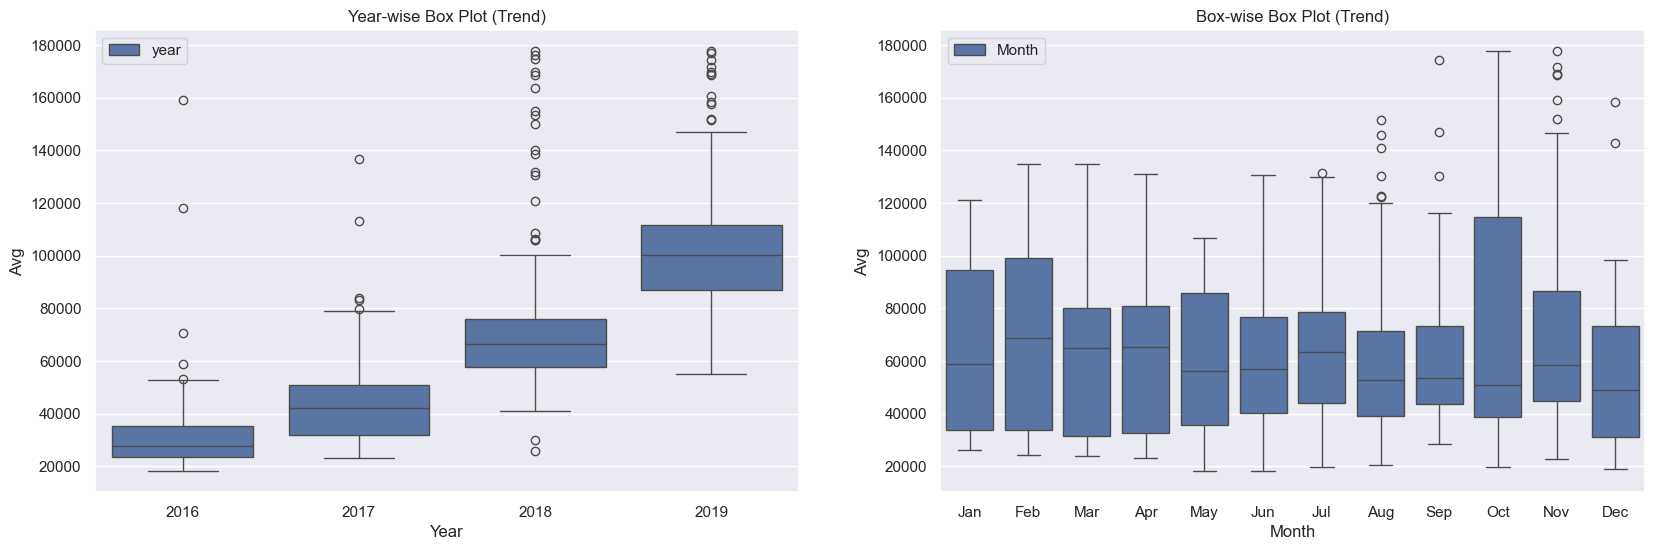

In [235]:

fig,(ax1,ax2)= plt.subplots(1,2,figsize=(20,6))


sns.boxplot(ax=ax1,x='year',y='views' ,data= df_box, label='year')
ax1.set(xlabel='Year',ylabel='Avg',title='Year-wise Box Plot (Trend)')

sns.boxplot(ax=ax2, x='month',y='views', data= df_box, label='Month',order=[
            "Jan",
            "Feb",
            "Mar",
            "Apr",
            "May",
            "Jun",
            "Jul",
            "Aug",
            "Sep",
            "Oct",
            "Nov",
            "Dec",
        ],)
ax2.set(xlabel='Month',ylabel='Avg',title='Box-wise Box Plot (Trend)')
plt.show()
